In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cifar10_data = np.load('cifar10.npz')

In [20]:
images = cifar10_data['raw']  # Raw image data
labels = cifar10_data['labels']  # Labels for the dataset
images

array([[[[158, 159, 165, ..., 137, 126, 116],
         [152, 151, 159, ..., 136, 125, 119],
         [151, 151, 158, ..., 139, 130, 120],
         ...,
         [ 68,  42,  31, ...,  38,  13,  40],
         [ 61,  49,  35, ...,  26,  29,  20],
         [ 54,  56,  45, ...,  24,  34,  21]],

        [[112, 111, 116, ...,  95,  91,  85],
         [112, 110, 114, ...,  95,  91,  88],
         [110, 109, 111, ...,  98,  95,  89],
         ...,
         [124, 100,  88, ...,  97,  64,  85],
         [116, 102,  85, ...,  82,  82,  64],
         [107, 105,  89, ...,  77,  84,  67]],

        [[ 49,  47,  51, ...,  36,  36,  33],
         [ 51,  40,  45, ...,  31,  32,  34],
         [ 47,  33,  36, ...,  34,  34,  33],
         ...,
         [177, 148, 137, ..., 146, 108, 127],
         [168, 148, 132, ..., 130, 126, 107],
         [160, 149, 132, ..., 124, 129, 110]]],


       [[[235, 231, 232, ..., 233, 233, 232],
         [238, 235, 235, ..., 236, 236, 235],
         [237, 234, 234, ..., 

In [4]:
unique_labels = np.unique(labels)
print(unique_labels)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
train_images = images.transpose(0, 2, 3, 1)  # (1000, 32, 32, 3)

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

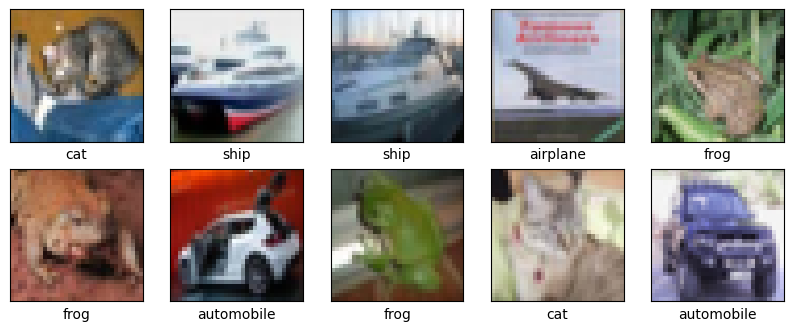

In [7]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])  # Display image
    plt.xlabel(class_names[labels[i]])  # Use the label directly
plt.show()

In [8]:
train_images_normalized = train_images / 255.0

In [9]:
# 3. Build a CNN model using TensorFlow/Keras
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer for 10 classes
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
X_train, X_val, y_train, y_val = train_test_split(train_images_normalized, labels, test_size=0.2, random_state=42)

In [12]:
len(y_train)

800

In [13]:
# 6. Train the model
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_val, y_val))

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.1315 - loss: 2.3082 - val_accuracy: 0.2450 - val_loss: 2.0913
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2642 - loss: 2.0148 - val_accuracy: 0.3350 - val_loss: 1.9707
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3474 - loss: 1.7759 - val_accuracy: 0.3900 - val_loss: 1.7811
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4460 - loss: 1.5747 - val_accuracy: 0.3400 - val_loss: 1.7864
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5387 - loss: 1.4463 - val_accuracy: 0.3150 - val_loss: 1.7269
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5912 - loss: 1.2657 - val_accuracy: 0.3950 - val_loss: 1.6991
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6781 - loss: 0.9997 - val_accuracy: 0.3850 - val_loss: 1.7050
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7201 - loss: 0.8843 - val_accuracy: 0.3400 - v

In [14]:
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print(f"\nTest accuracy: {test_acc}")


7/7 - 0s - 10ms/step - accuracy: 0.3650 - loss: 3.6355

Test accuracy: 0.36500000953674316


In [15]:
import random

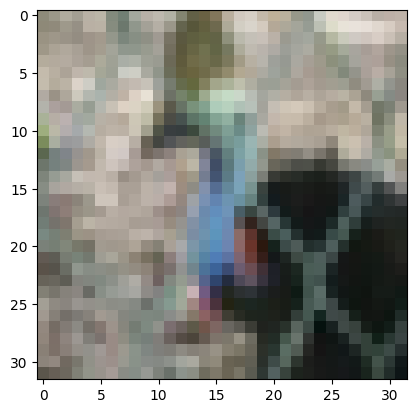

In [16]:
n = random.randint(0,99)
plt.imshow(X_val[n])
plt.show()

In [17]:
import numpy as np
predicted_value=model.predict(X_val)
ans  = np.argmax(predicted_value[n])
print(class_names[ans])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
truck


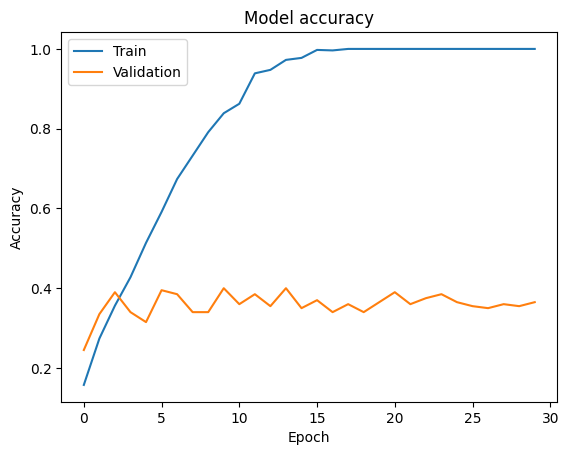

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


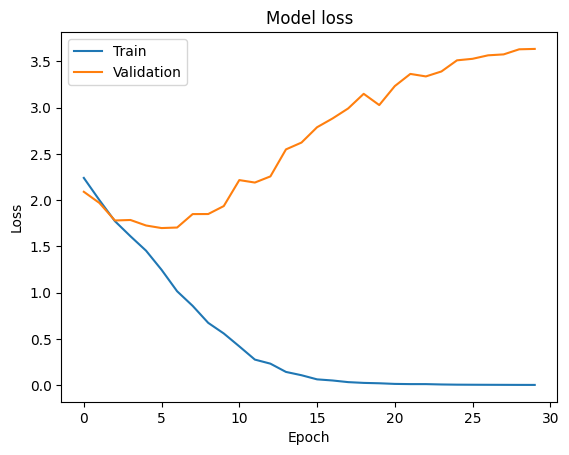

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()